## Basic Stock Analysis 
#### Bryant Crocker 

In [24]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import ffn
import holoviews as hv
%matplotlib inline

In order to pull in daily stock prices I will use the ffn library. The ffn library pulls in data from yahoo finance.  I will start on the first of Janauary 2010.  A few years after the 2008 recession.


I am looking at:

* Under Armour - UAA

* Nike - NKE 

* Adidas - ADS

* Vans Footwear Company - VFC


In [25]:
# download price data from Yahoo! Finance. By default,
# the Adj. Close will be used.
prices = ffn.get('nke,ads,vfc,uaa', start='2010-01-01')
#Use the pd.head() method to get an idea of what the data looks like
prices.head()

,nke,ads,vfc,uaa
Date,,,,
2010-01-04,12.217500,64.814217,11.234499,3.51000
2010-01-05,12.266110,64.942101,11.448840,3.61500
2010-01-06,12.191328,65.266708,11.402914,3.69500
2010-01-07,12.310980,65.866745,11.623373,3.65125
2010-01-08,12.286675,66.575005,11.562134,3.64375


A simple plot of historical prices.  Their seems to be a fair deal of variabilty around the price of Adidas. 

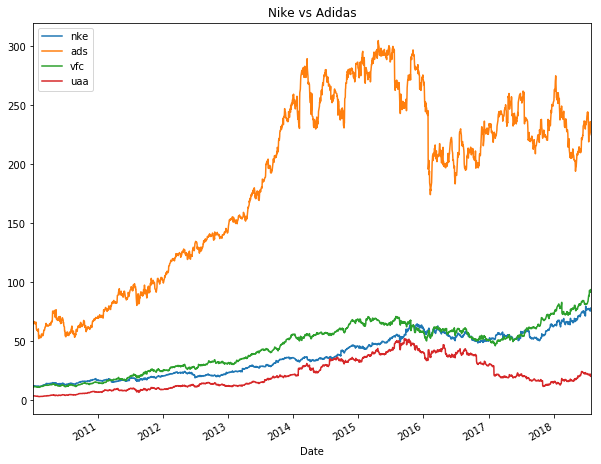

In [26]:
#plot a simply line plot to show the prices of the two assets over time.
prices[['nke', 'ads','vfc','uaa']].plot(figsize=(10,8))

plt.title("Nike vs Adidas")
plt.show()

Under armour has the highest returns on average.  Note that the x-axis of the histograms are not on the same scale.

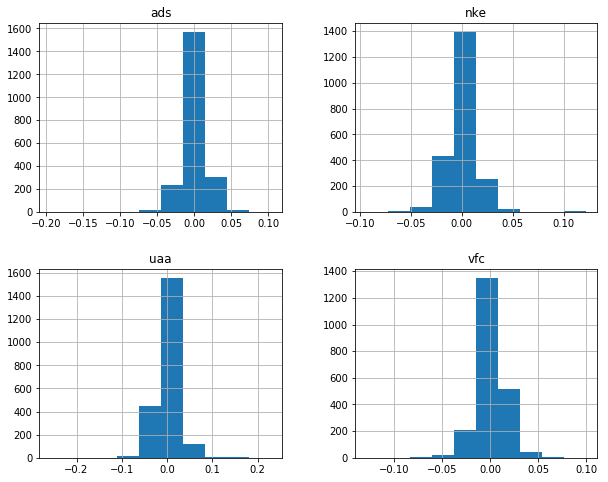

In [27]:
returns = prices.to_returns().dropna()
ax = returns.hist(figsize=(10,8))

nke    0.000958
ads    0.000725
vfc    0.001087
uaa    0.001147
dtype: float64

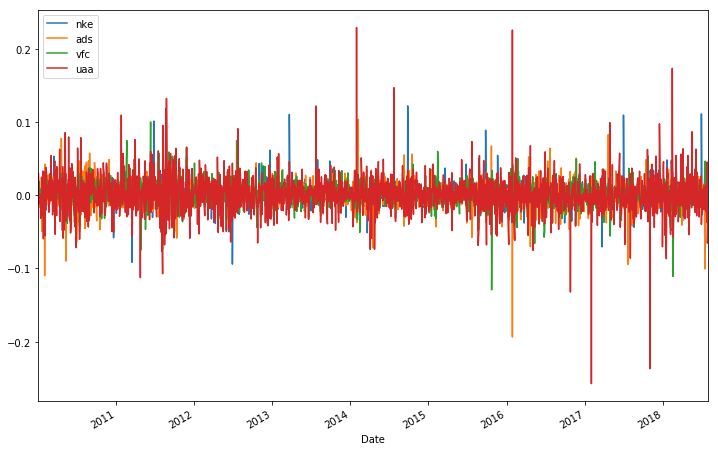

In [28]:
returns.plot(figsize=(12,8))
returns.mean()

# Under Armor Forecast

In [29]:
UnderArmor = prices['uaa']

In [30]:
UnderArmor = pd.DataFrame(UnderArmor).reset_index().rename(columns={"Date": "ds", "uaa": "y"})

In [31]:
from fbprophet import Prophet

m = Prophet()
m.fit(UnderArmor)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2518,2019-07-26,5.461160,-0.325943,10.769405
2519,2019-07-27,5.560485,-0.056129,11.050841
2520,2019-07-28,5.550545,0.057014,10.888114
2521,2019-07-29,5.399318,-0.217864,10.707584
2522,2019-07-30,5.307445,-0.024691,10.638716


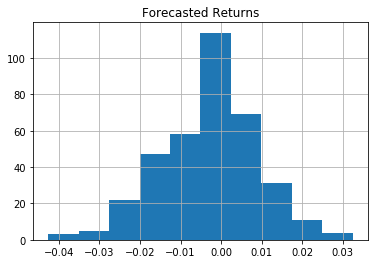

In [32]:
today = pd.to_datetime('today')
UnderArmorf = forecast[forecast.ds > today]
UnderArmorf['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

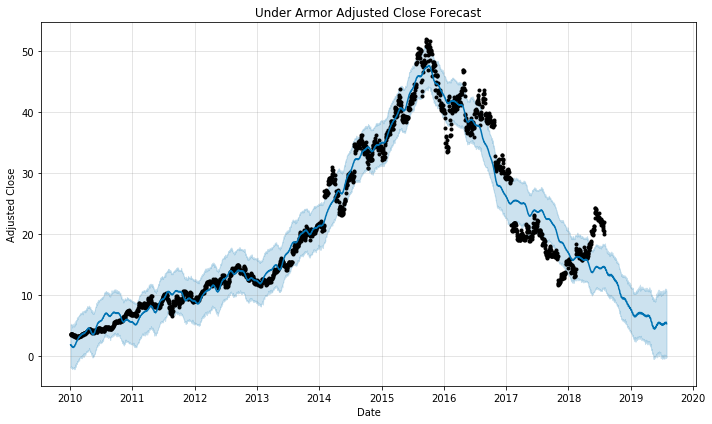

In [33]:
m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Under Armor Adjusted Close Forecast")
plt.tight_layout()
plt.savefig("UnderArmor.png")
plt.show()

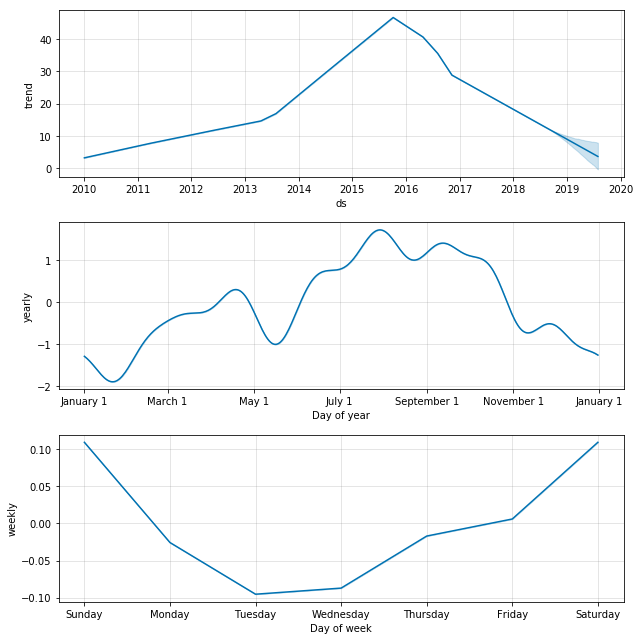

In [34]:
# Python
fig2 = m.plot_components(forecast)

# Nike Forecast 

In [35]:
Nike = prices['nke']
Nike = pd.DataFrame(Nike).reset_index().rename(columns={"Date": "ds", "nke": "y"})
m = Prophet()
m.fit(Nike)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2518,2019-07-26,84.027299,77.016163,91.968925
2519,2019-07-27,83.879149,76.624249,92.178349
2520,2019-07-28,83.844165,76.502343,91.968935
2521,2019-07-29,83.900487,76.140807,92.050154
2522,2019-07-30,83.799892,75.781049,91.474257


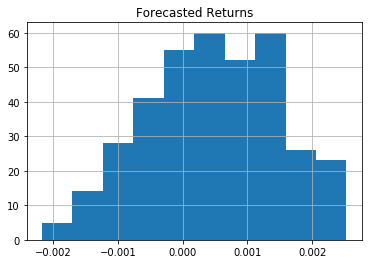

In [36]:
today = pd.to_datetime('today')
Nikef = forecast[forecast.ds > today]
Nikef['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

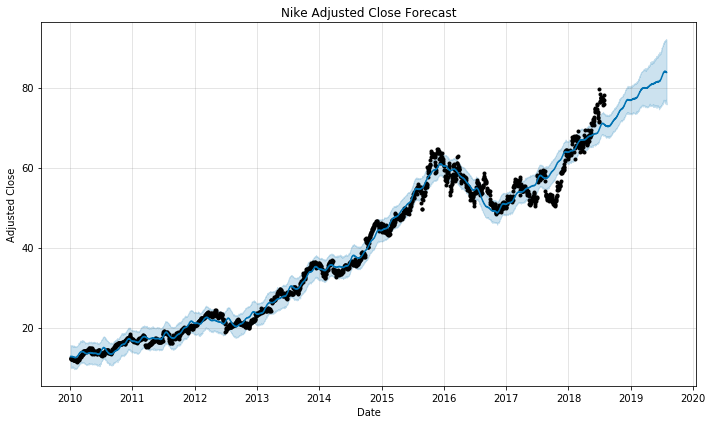

In [37]:
m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Nike Adjusted Close Forecast")
plt.savefig('nike.png')
plt.tight_layout()
plt.show()

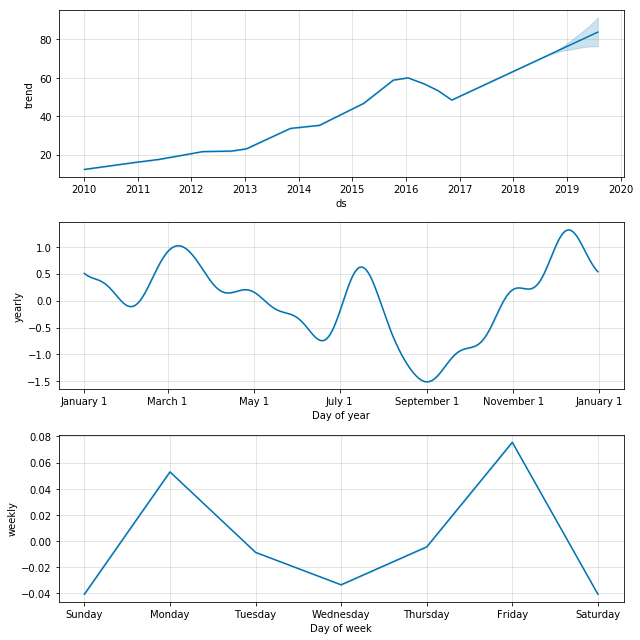

In [38]:
# Python
fig2 = m.plot_components(forecast)

# Adidas Forecast

In [39]:
Adidas = prices['ads']
Adidas = pd.DataFrame(Adidas).reset_index().rename(columns={"Date": "ds", "ads": "y"})
m = Prophet()
m.fit(Adidas)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2518,2019-07-26,235.021641,192.666506,272.211681
2519,2019-07-27,238.505195,198.045139,274.738128
2520,2019-07-28,238.133084,196.564945,275.614286
2521,2019-07-29,233.831858,189.662835,269.510210
2522,2019-07-30,233.376506,190.264820,272.391291


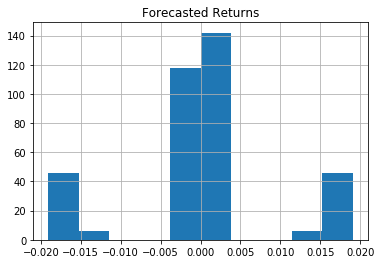

In [40]:
today = pd.to_datetime('today')
Adidasf = forecast[forecast.ds > today]
Adidasf['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

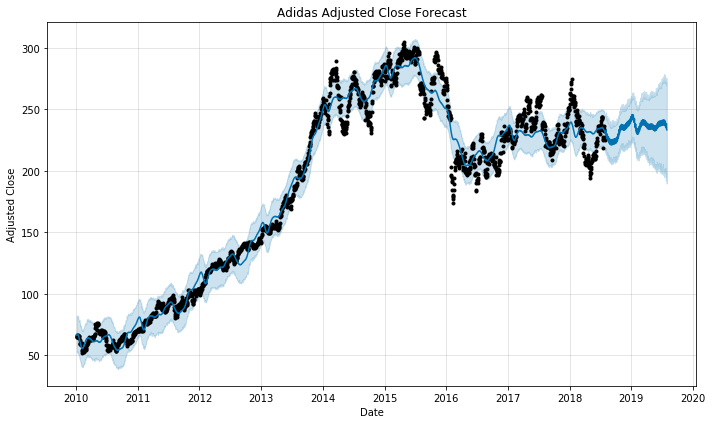

In [41]:
fig1 = m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Adidas Adjusted Close Forecast")
plt.tight_layout()
plt.savefig("Adidas.png")
plt.show()

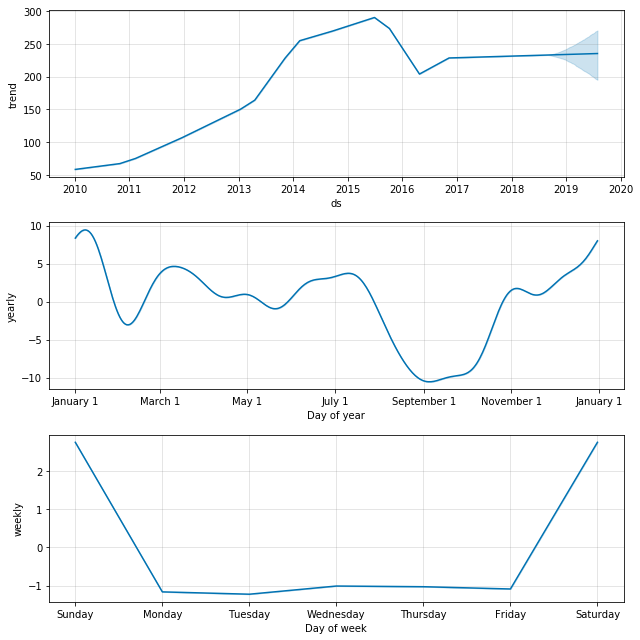

In [42]:
# Python
fig2 = m.plot_components(forecast)

# Vans Footwear Forecast

In [43]:
Vans = prices['vfc']
Vans = pd.DataFrame(Vans).reset_index().rename(columns={"Date": "ds", "vfc": "y"})
m = Prophet()
m.fit(Vans)
# Python
future = m.make_future_dataframe(periods=365)
future.tail()
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
2518,2019-07-26,107.554123,92.399359,123.738116
2519,2019-07-27,107.014228,91.110568,123.874523
2520,2019-07-28,107.094460,91.349075,123.745371
2521,2019-07-29,107.784908,91.908114,124.106802
2522,2019-07-30,107.840727,91.378324,124.440413


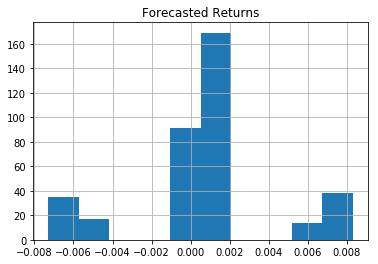

In [44]:
today = pd.to_datetime('today')
vansf = forecast[forecast.ds > today]
vansf['yhat'].to_returns().hist()
plt.title("Forecasted Returns")
plt.show()

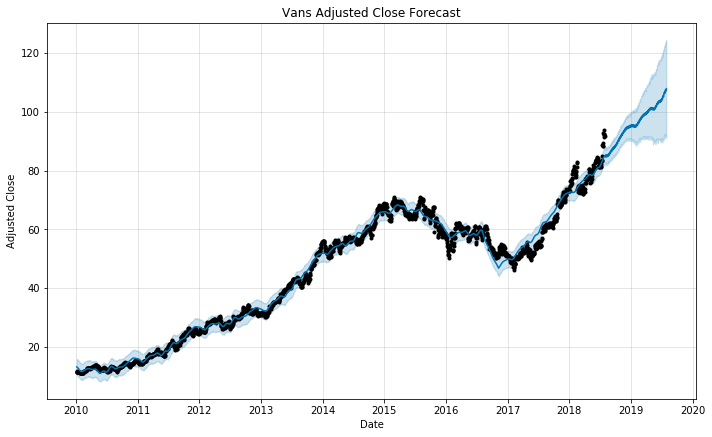

In [45]:
m.plot(forecast)
plt.xlabel("Date")
plt.ylabel("Adjusted Close")
plt.title("Vans Adjusted Close Forecast")
plt.savefig("vans.png")
plt.show()

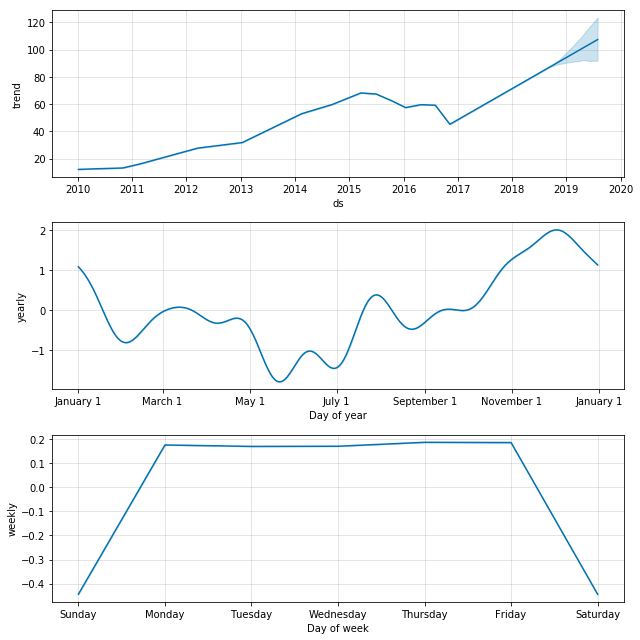

In [46]:
# Python
fig2 = m.plot_components(forecast)